In [10]:
from astropy.wcs import WCS
from astropy.io import fits
from astropy import wcs

fh = fits.open('RGG5_14kmps_20klambda.mom0.fits')
data = fh[0].data.squeeze() # drops the size-1 axes
header = fh[0].header
print(header)
mywcs = wcs.WCS(header).celestial
new_header = mywcs.to_header()
new_fh = fits.PrimaryHDU(data=data, header=new_header)
new_fh.writeto('new1.fits', overwrite=True)



optical = fits.open('../RGG5_SDSS_r_mosaic.fits')
data = optical[0].data
header = optical[0].header
header['BMAJ'] = 3.185909477118E-03  
header['BMIN'] = 2.837963297030E-03
header['BPA'] = 8.250498495540E+01

new_fh = fits.PrimaryHDU(data=data, header=header)
new_fh.writeto('RGG5_SDSS_r_mosaic_beam.fits', overwrite=True)

SIMPLE  =                    T /Standard FITS                                   BITPIX  =                  -32 /Floating point (32 bit)                         NAXIS   =                    4                                                  NAXIS1  =                   99                                                  NAXIS2  =                   70                                                  NAXIS3  =                    1                                                  NAXIS4  =                    1                                                  EXTEND  =                    T                                                  BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 BZERO   =   0.000000000000E+00                                                  BMAJ    =   3.185909477118E-03                                                  BMIN    =   2.837963297030E-03                                                  BPA     =   8.250498495540E+01          

[0.075, 0.10606601717798213, 0.15000000000000002, 0.2121320343559643, 0.30000000000000004, 0.4242640687119287, 0.6000000000000002, 0.8485281374238575, 1.2000000000000004, 1.697056274847715, 2.4000000000000017, 3.3941125496954303, 4.800000000000004, 6.7882250993908615, 9.600000000000009]


Set OBSGEO-B to    19.090653 from OBSGEO-[XYZ].
Set OBSGEO-H to      636.997 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/usr/local/lib/python3.6/dist-packages/astropy/visualization/wcsaxes/core.py:234: UserWarning: The following kwargs were not used by contour: 'lw'
  cset = super().contour(*args, **kwargs)


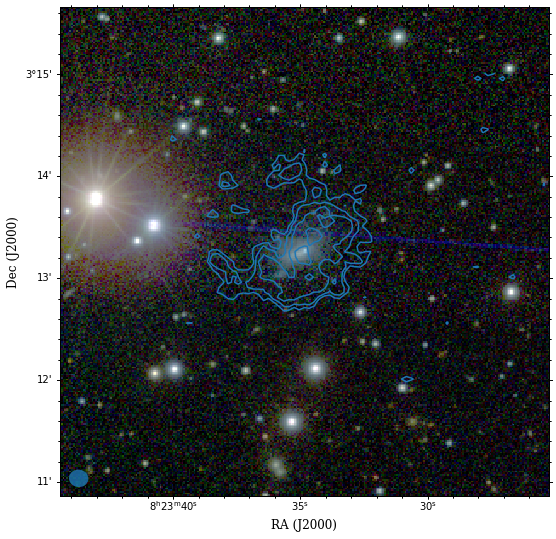

In [19]:
%matplotlib inline

import aplpy
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits


fig = aplpy.FITSFigure('RGG5_SDSS_r_mosaic_beam.fits')
#fig.show_colorscale(vmin=1, stretch='log', cmap='Greys')

fig.show_rgb('../RGG5_sdss_rgb.png')

levels = [0.075*np.sqrt(2)**i for i in range(15)]
print(levels)

fig.show_contour('new1.fits',
                 levels=levels, colors='C0', alpha=1, lw=4)
#fig.show_contour('AGC203001_full_MOM0.FITS',levels=levels, colors='C0', alpha=1)

#fig.colorbar.set_axis_label_text('Velocity (m/s)')
#fig.recenter(155.48, 13.7677, width=0.22, height=0.19) # centering for large-scale image


fig.recenter(125.895182, 3.221013, width=0.08, height=0.08) # centering for a zoomed image


fig.axis_labels.set_font(size=12, weight='medium', \
                         stretch='normal', family='serif', \
                         style='normal', variant='normal')
#fig.tick_labels.set_font(size=12)
fig.axis_labels.set_xtext('RA (J2000)')
fig.axis_labels.set_ytext('Dec (J2000)')

#fig.add_scalebar(100/3600*(40/38.1), textcolor='white') # length has to be specified
#fig.scalebar.set_label('40 kpc')
#fig.scalebar.set_color('white')

#fig.axis_labels.hide()
#fig.tick_labels.hide()

#fig.add_label(155.49849, 13.76, 'G1', color='C3', fontsize=18)
#fig.add_label(155.4566, 13.733 , 'G2', color='C3', fontsize=18)
#fig.add_label(155.383270361, 13.705 , 'G3', color='C3', fontsize=18)
#fig.add_label(155.590548398, 13.839632371 , 'G4', color='C3', fontsize=18)

fig.add_beam(alpha=0.8)
#fig.set_system_latex(True)


fig.save('HI_overlay_20klambda.png', dpi=300)